In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
only_obj = pd.read_csv("result/result_only_obj.csv")
only_profit = pd.read_csv("result/result_only_profit.csv")
der_indices = list(range(len(only_profit)))

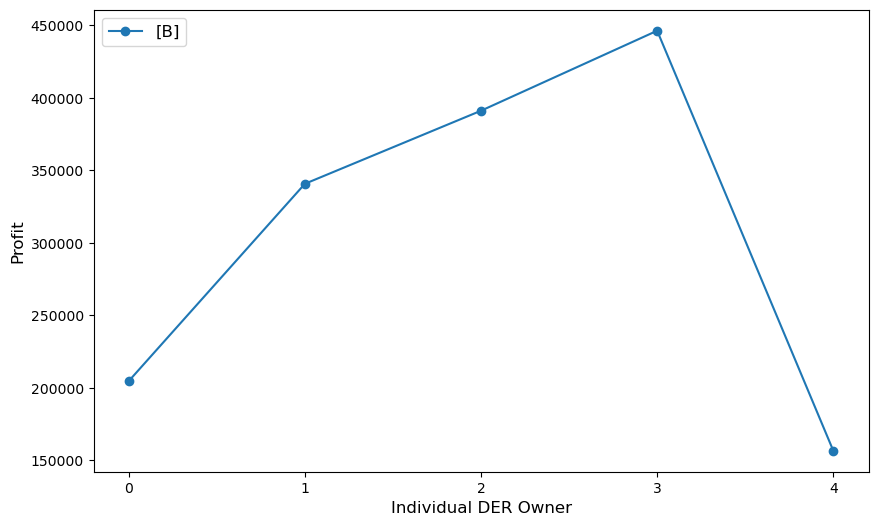

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(der_indices, only_profit["only_profit_value"], marker="o", label="[B]")
# plt.plot(der_indices, second, marker="o", label="[2]")
# plt.plot(der_indices, final_profit, marker="o", label="[3]")
# plt.plot(der_indices, fourth, marker="o", label="[4]")

ax.set_xlabel("Individual DER Owner", fontsize=12)
ax.set_ylabel("Profit", fontsize=12)
ax.set_xticks(der_indices)  # DER owner 인덱스 설정
ax.legend(loc="upper left", fontsize=12, ncols=3)

plt.show()

## 전

In [2]:
only_obj = pd.read_csv("result/result_only_obj.csv")
only_profit = pd.read_csv("result/result_only_profit.csv")

agg_obj = pd.read_csv("result/result_agg_obj.csv")
agg_profit = pd.read_csv("result/result_agg_profit.csv")

In [3]:
def plot_obj_comparison(i):
    plt.figure(figsize=(8, 5))
    x = np.arange(i + 1)
    width = 0.35

    plt.bar(0, agg_obj["agg_obj"], width, label="base_agg", alpha=0.7)
    values = [agg_obj["agg_obj"].iloc[0]]
    for j in range(1, i + 1):
        set_obj = pd.read_csv(f"result/result_set{j}_profit.csv")
        set_agg_profit = sum(set_obj["set_profit_value"])
        plt.bar(j, set_agg_profit, width, label=f"ver {j}", alpha=0.7)
        values.append(set_agg_profit)

    plt.plot(x, values, color='black', marker='o', linestyle='--', linewidth=1)

    plt.title("Aggregated Profit Comparison")
    plt.xticks(x)
    plt.ylabel("Profit")
    plt.ylim(8500, )
    plt.grid(True, linestyle='-', alpha=0.7)
    plt.legend()
    plt.show()

In [4]:
def plot_profit_comparison(i):
    plt.figure(figsize=(8, 5))
    x = np.arange(len(only_profit))
    width = 0.3
    plt.bar(
        x - 0.5 * width,
        only_profit["only_profit_value"],
        width,
        label="individual", 
        color="#FFD700",
    )
    # plt.bar(x, agg_profit['agg_profit_value'], width, label='ex-post', color='#009E73')
    
    set_profit = pd.read_csv(f"result/result_set{i}_profit.csv")
    plt.bar(
        x + 0.5 * width,
        set_profit["set_profit_value"],
        width,
        label=(f"ver {i}"),
        color="#56B4E9", 
    )
    plt.title(f"Profit Comparison")
    plt.xticks(x)
    plt.ylabel("Profit")
    plt.ylim(0,1800)
    plt.legend()
    plt.show()

In [5]:
def plot_d_comparison(i):
    plt.figure(figsize=(8, 5))
    x = np.arange(len(only_profit))
    width = 0.3
    d = pd.read_csv(f"result/result_set{i}_d.csv")
    d0 = pd.read_csv(f"result/result_set1_d.csv")
    # plt.bar(
    #     x - 0.5 * width,
    #     d0["set_d_given"],
    #     width,
    #     label="base_given",
    #     color="limegreen",
    #     # alpha = 0.4
    # )
    plt.bar(
        x - 0.5 * width,
        d["set_d_given"],
        width,
        label="given",
        color="limegreen",
        alpha = 0.8
    )
    # plt.bar(
    #     x + 0.5 * width,
    #     d0["set_d_received"],
    #     width,
    #     label="base_received",
    #     color="red",
    #     # alpha=0.4,
    # )
    plt.bar(
        x + 0.5 * width,
        d["set_d_received"],
        width,
        label="received",
        color="red",
        alpha=0.8,
    )

    plt.title(f"Exchanged (version {i})")
    plt.title(f"Exchanged")
    plt.xticks(x)
    plt.ylabel("Exchanged")
    plt.ylim(0,25)
    plt.legend()
    plt.show()

In [6]:
def plot_d_detailed_comparison(i):
    plt.figure(figsize=(8, 5))
    x = np.arange(len(only_profit))
    width = 0.3
    d = pd.read_csv(f"result/result_set{i}_d.csv")
    d0 = pd.read_csv(f"result/result_set1_d.csv")
    plt.bar(
        x - 0.5 * width,
        d0["set_d_given"],
        width,
        label="base_given",
        color="limegreen",
        # alpha = 0.4
    )
    plt.bar(
        x - 0.5 * width,
        d["set_d_given"],
        width,
        label="given",
        color="limegreen",
        alpha = 0.8
    )
    plt.bar(
        x + 0.5 * width,
        d0["set_d_received"],
        width,
        label="base_received",
        color="red",
        # alpha=0.4,
    )
    plt.bar(
        x + 0.5 * width,
        d["set_d_received"],
        width,
        label="received",
        color="red",
        alpha=0.8,
    )

    # 수직선(Vertical Line) 추가
    for a in range(len(x)):
        # base_given → given (초록색 세로선)
        plt.plot(
            [x - 0.5 * width, x - 0.5 * width],
            [d0["set_d_given"], d["set_d_given"]],
            color="gray",
            linestyle="-",
            linewidth=0.8,
        )
        # base_received → received (빨간색 세로선)
        plt.plot(
            [x + 0.5 * width, x + 0.5 * width],
            [d0["set_d_received"], d["set_d_received"]],
            color="gray",
            linestyle="-",
            linewidth=0.8,
        )
        # 가로선 (눈금) 추가
        plt.hlines(
            d0["set_d_given"],
            x - 0.5 * width - 0.1,
            x - 0.5 * width + 0.1,
            color="gray",
            linewidth=0.8,
        )
        plt.hlines(
            d["set_d_given"],
            x - 0.5 * width - 0.1,
            x - 0.5 * width + 0.1,
            color="gray",
            linewidth=0.8,
        )
        plt.hlines(
            d0["set_d_received"],
            x + 0.5 * width - 0.1,
            x + 0.5 * width + 0.1,
            color="gray",
            linewidth=0.8,
        )
        plt.hlines(
            d["set_d_received"],
            x + 0.5 * width - 0.1,
            x + 0.5 * width + 0.1,
            color="gray",
            linewidth=0.8,
        )
        # given → received 연결선 추가 (파란색)
        plt.plot(
            [x - 0.5 * width, x + 0.5 * width],
            [d["set_d_given"], d["set_d_received"]],
            color="black",
            linestyle=":",
            linewidth=1.5,
        )
    plt.title(f"Exchanged (version {i})")
    plt.title(f"Exchanged")
    plt.xticks(x)
    plt.ylabel("Exchanged")
    plt.ylim(0,18)
    plt.legend()
    plt.show()

### 결과 분석

In [8]:
plot_obj_comparison(6)
plot_profit_comparison(5)
plot_d_comparison(5.2)

### figure_price

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

R_flat = pd.read_csv("result/result_R.csv")

I_len = R_flat["generator"].nunique()
T_len = R_flat["time"].nunique()
S_len = R_flat["scenario"].nunique()

R = R_flat.pivot_table(
    values="value", index="generator", columns=["time", "scenario"]
).to_numpy()
R = R.reshape(I_len, T_len, S_len)

I, T, S = R.shape

price_q = pd.read_csv(
    "/Users/jangseohyun/Documents/workspace/symply/DER/DATA_price.csv"
)
price_q["Time"] = pd.to_datetime(price_q["Time"], format="%Y-%m-%d %H:%M")

price_q["Hour"] = price_q["Time"].dt.floor("h")
price_h = price_q.groupby("Hour").mean(numeric_only=True)

price = price_h.iloc[: S * T]

P_DA = np.array(
    [sum(price["Price"].iloc[t + s * T] for s in range(S)) / S * 1.2 for t in range(T)]
)
P_RT = np.array([[price["Price"].iloc[t + s * T] for s in range(S)] for t in range(T)])
P_PN = np.array(
    [sum(price["Price"].iloc[t + s * T] for s in range(S)) / S * 2 for t in range(T)]
)

only_profit = pd.read_csv("result/result_only_profit.csv").values

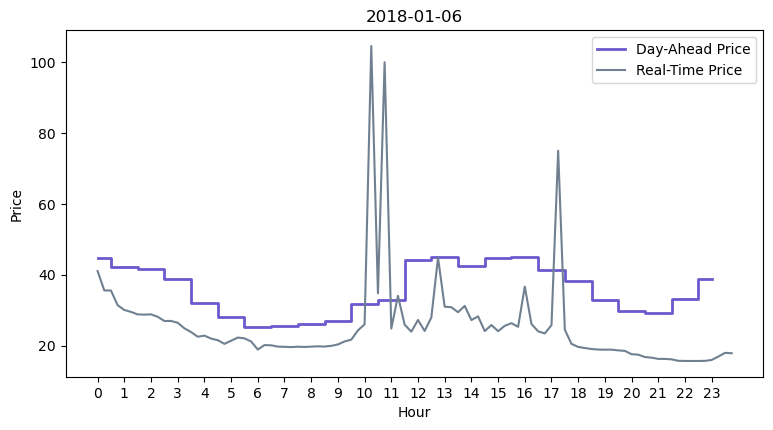

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ price_q를 Time 기준으로 정렬
price_q = price_q.sort_values("Time")

# ✅ 보고 싶은 시나리오 리스트 설정
selected_scenarios = [5]

plt.figure(figsize=(9, 4.5))

# ✅ P_DA (Day-Ahead Price) - 한 시간 단위로 유지 (계단형)
time_indices_DA = price_h.index[:T].hour  # 1시간 단위 → 시간만 추출
plt.step(
    time_indices_DA,
    P_DA,
    linestyle="-",
    color="slateblue",
    linewidth=2.0,  # 두꺼운 선
    where="mid",  # ⬅ 계단형으로 유지
    label="Day-Ahead Price",
)

# ✅ 선택한 시나리오 개별적으로 플랏
for s_idx in selected_scenarios:
    target_date = price_q["Time"].dt.date.unique()[s_idx]  # 시나리오별 날짜 확인
    subset = price_q[price_q["Time"].dt.date == target_date]  # 해당 날짜 데이터 필터링
    if subset.empty:
        print(f"Warning: No data found for Scenario {s_idx} (Date: {target_date})")
        continue

    plt.plot(
        subset["Time"].dt.hour + subset["Time"].dt.minute / 60,
        subset["Price"],
        linestyle="-",
        color="slategray",
        # alpha=0.8,
        label=f"Real-Time Price",
    )

# 그래프 설정
plt.xlabel("Hour")
plt.ylabel("Price")
plt.legend()
plt.xticks(np.arange(0, 24, 1))
# plt.grid(True)
plt.title(f"{target_date}")
# plt.show()
plt.savefig("figure/fig_price.pdf", bbox_inches="tight", pad_inches=0.05)

### fig_avgprice

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

R_flat = pd.read_csv("result/result_R.csv")

I_len = R_flat["generator"].nunique()
T_len = R_flat["time"].nunique()
S_len = R_flat["scenario"].nunique()

R = R_flat.pivot_table(
    values="value", index="generator", columns=["time", "scenario"]
).to_numpy()
R = R.reshape(I_len, T_len, S_len)

I, T, S = R.shape

price_q = pd.read_csv(
    "/Users/jangseohyun/Documents/workspace/symply/DER/DATA_price.csv"
)
price_q["Time"] = pd.to_datetime(price_q["Time"], format="%Y-%m-%d %H:%M")

price_q["Hour"] = price_q["Time"].dt.floor("h")
price_h = price_q.groupby("Hour").mean(numeric_only=True)

price = price_h.iloc[: S * T]

P_DA = np.array(
    [sum(price["Price"].iloc[t + s * T] for s in range(S)) / S * 1.2 for t in range(T)]
)
P_RT = np.array([[price["Price"].iloc[t + s * T] for s in range(S)] for t in range(T)])
P_PN = np.array(
    [sum(price["Price"].iloc[t + s * T] for s in range(S)) / S * 2 for t in range(T)]
)

only_profit = pd.read_csv("result/result_only_profit.csv").values

total_x = pd.read_csv(
    "/Users/jangseohyun/Documents/workspace/symply/DER/result/result_base_totalX.csv"
)
alpha = pd.read_csv(
    "/Users/jangseohyun/Documents/workspace/symply/DER/result/result_base_alpha.csv"
)

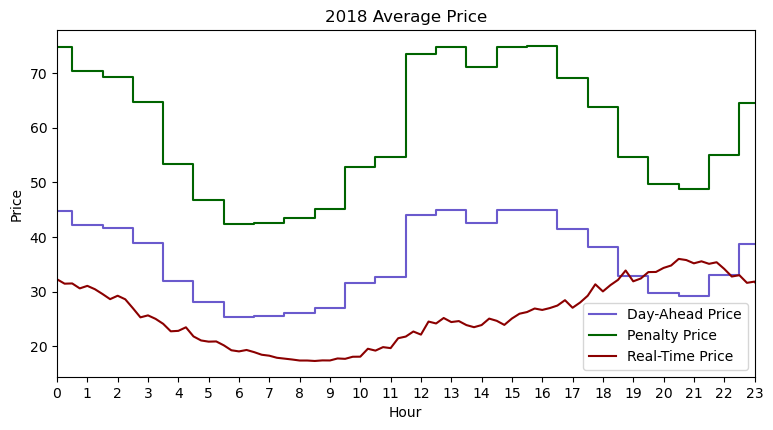

In [111]:
# ✅ price_q를 Time 기준으로 정렬
price_q = price_q.sort_values("Time")

# ✅ 모든 시나리오의 평균 Real-Time Price 계산
price_q["Hour"] = (
    price_q["Time"].dt.hour + price_q["Time"].dt.minute / 60
)  # 시간을 소수 형태로 변환
rt_price_avg = price_q.groupby("Hour")["Price"].mean()  # 시간별 평균 가격 계산

plt.figure(figsize=(9, 4.5))

# ✅ P_DA (Day-Ahead Price) - 한 시간 단위로 유지 (계단형)
time_indices_DA = price_h.index[:T].hour  # 1시간 단위 → 시간만 추출
plt.step(
    time_indices_DA,
    P_DA,
    linestyle="-",
    color="slateblue",
    linewidth=1.5,  # 두꺼운 선
    where="mid",
    label="Day-Ahead Price",
)

# ✅ P_PN (Penalty Price) 추가 (계단형)
plt.step(
    time_indices_DA,
    P_PN,
    linestyle="-",
    color="darkgreen",  # 어두운 녹색
    linewidth=1.5,
    where="mid",
    label="Penalty Price",
)

# ✅ 모든 시나리오 평균 Real-Time Price 추가 (부드러운 곡선)
plt.plot(
    rt_price_avg.index,
    rt_price_avg,
    linestyle="-",
    color="darkred",
    linewidth=1.5,
    label="Real-Time Price",
)

# 그래프 설정
plt.xlabel("Hour")
plt.ylabel("Price")
plt.legend()
plt.xticks(np.arange(0, 24, 1))
plt.xlim(0, 23)  # ✅ x축을 0~23으로 고정
plt.title(f"2018 Average Price")

# ✅ 그래프 저장
plt.savefig("figure/fig_avgprice.pdf", bbox_inches="tight", pad_inches=0.05)

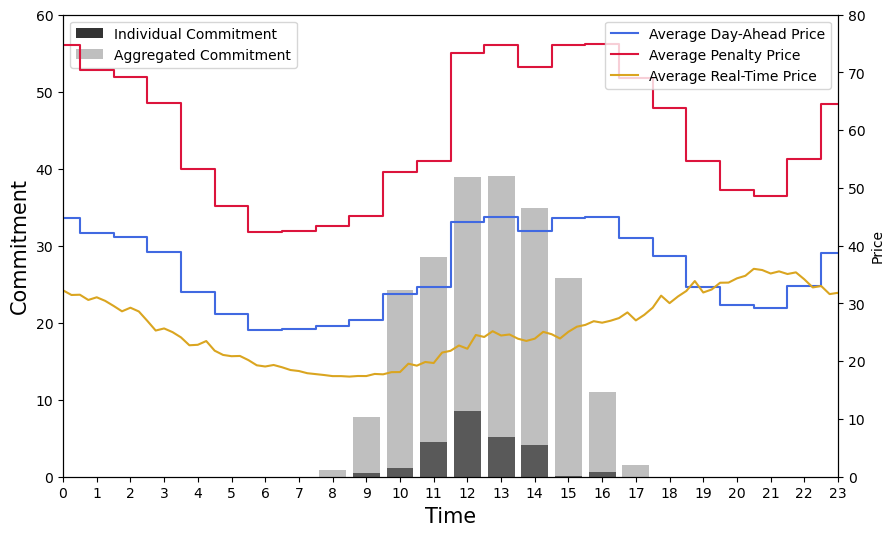

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 데이터 정리
# ✅ price_q를 Time 기준으로 정렬
price_q = price_q.sort_values("Time")

# ✅ 모든 시나리오의 평균 Real-Time Price 계산
price_q["Hour"] = (
    price_q["Time"].dt.hour + price_q["Time"].dt.minute / 60
)  # 시간을 소수 형태로 변환
rt_price_avg = price_q.groupby("Hour")["Price"].mean()  # 시간별 평균 가격 계산

# ✅ Figure 및 두 개의 Y축 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# ✅ 첫 번째 Y축 (막대 그래프 - Commitment)
ax1.bar(
    np.arange(T),
    total_x.iloc[:T, 0],  # Individual Participation
    color="black",
    alpha=0.8,
    label="Individual Commitment",
)
ax1.bar(
    np.arange(T),
    alpha.iloc[:T, 0],  # Aggregated Participation
    color="gray",
    alpha=0.5,
    label="Aggregated Commitment",
)

# ✅ 첫 번째 Y축 설정
ax1.set_xlabel("Time", fontsize=15)
ax1.set_ylabel("Commitment", fontsize=15)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xlim(0, 23)
ax1.set_ylim(0, 60)

# ✅ 두 번째 Y축 (전력 가격 - 선 그래프)
ax2 = ax1.twinx()

# ✅ P_DA (Day-Ahead Price)
ax2.step(
    time_indices_DA,
    P_DA[:T],
    linestyle="-",
    color="royalblue",
    linewidth=1.5,
    where="mid",
    label="Average Day-Ahead Price",
)

# ✅ P_PN (Penalty Price)
ax2.step(
    time_indices_DA,
    P_PN[:T],
    linestyle="-",
    color="crimson",  # ✅ 부드러운 녹색
    linewidth=1.5,
    where="mid",
    label="Average Penalty Price",
)

# ✅ 모든 시나리오 평균 Real-Time Price 추가
plt.plot(
    rt_price_avg.index,
    rt_price_avg,
    linestyle="-",
    color="goldenrod",
    linewidth=1.5,
    label="Average Real-Time Price",
)

# ✅ 두 번째 Y축 설정
ax2.set_ylabel("Price")
ax2.set_xlim(0, 23)
ax2.set_ylim(0, 80)

# ✅ 범례 위치 정리
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# ✅ 그래프 저장
plt.savefig(
    "figure/fig_price_comm.pdf", bbox_inches="tight", pad_inches=0.05
)

plt.show()

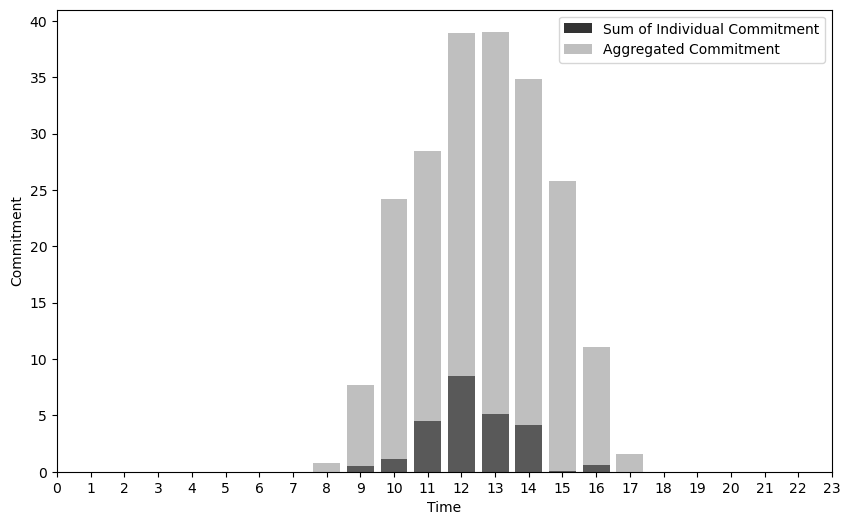

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 데이터 정리
price_q = price_q.sort_values("Time")

# ✅ Time을 기반으로 Hour 생성 (시간을 소수 형태로 변환)
price_q["Hour"] = price_q["Time"].dt.hour + price_q["Time"].dt.minute / 60

# ✅ Figure 및 Y축 생성 (두 번째 Y축 제거)
fig, ax1 = plt.subplots(figsize=(10, 6))

# ✅ 첫 번째 Y축 (막대 그래프 - Commitment만 그림)
ax1.bar(
    np.arange(T),
    total_x.iloc[:T, 0],  # Individual Participation
    color="black",
    alpha=0.8,
    label="Sum of Individual Commitment",
)
ax1.bar(
    np.arange(T),
    alpha.iloc[:T, 0],  # Aggregated Participation
    color="gray",
    alpha=0.5,
    label="Aggregated Commitment",
)

# ✅ 첫 번째 Y축 설정
ax1.set_xlabel("Time")
ax1.set_ylabel("Commitment")
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xlim(0, 23)

# ✅ 범례 추가
ax1.legend(loc="upper right")

# ✅ 그래프 저장 (Commitment 막대만 포함)
plt.savefig("figure/fig_comm.pdf", bbox_inches="tight", pad_inches=0.05)

plt.show()